In [28]:
import pandas as pd
import openpyxl
import glob
import seaborn as sns
import re
from unidecode import unidecode 
import matplotlib.pyplot as plt

In [30]:
def encontrar_fila_inicio(archivo):
    # Cargar el archivo de Excel utilizando openpyxl
    wb = openpyxl.load_workbook(archivo)
    sheet = wb.active

    # Buscar la fila de inicio recorriendo las celdas de cada columna
    for row in sheet.iter_rows():
        if row[3].value is not None:
            return row[3].row

    return None  # Si no se encuentra una fila de inicio válida

def remove_accents(x):
    if isinstance(x, str):
        return unidecode(x)
    else:
        return x

In [39]:
archivos_excel = glob.glob('*.xlsx')
lista_dataframes = []

for archivo in archivos_excel:
    startIndex = encontrar_fila_inicio(archivo)
    df = pd.read_excel(archivo, skiprows  = startIndex - 1)
    df.columns = df.columns.str.replace('\n', ' ')
    df.columns = df.columns.str.replace('  ', ' ')
    lista_dataframes.append(df)

df_concatenado = pd.concat(lista_dataframes)

In [4]:
#df_concatenado

In [40]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368608 entries, 0 to 53799
Data columns (total 33 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Código de la Institución                 368608 non-null  int64 
 1   IES PADRE                                368608 non-null  int64 
 2   Institución de Educación Superior (IES)  368608 non-null  object
 3   Principal o Seccional                    368608 non-null  object
 4   ID Sector IES                            368608 non-null  int64 
 5   Sector IES                               368608 non-null  object
 6   ID Caracter                              368608 non-null  int64 
 7   Caracter IES                             368608 non-null  object
 8   Código del departamento (IES)            368608 non-null  int64 
 9   Departamento de domicilio de la IES      368608 non-null  object
 10  Código del Municipio (IES)               3686

In [41]:
lista_columnas_a_eliminar = ['Código de la Institución',
                             'IES PADRE',
                             'ID Sector IES',
                             'ID Caracter',
                             'Código del departamento (IES)',
                             'Código del Municipio (IES)',
                             'Municipio de domicilio de la IES',
                             'Código SNIES del programa',
                             'ID Nivel Académico',
                             'ID Nivel de Formación',
                             'ID Metodología',
                             'ID Área',
                             'Id_Nucleo',
                             'Núcleo Básico del Conocimiento (NBC)',
                            'Código del Departamento (Programa)',
                             'Departamento de oferta del programa',
                             'Código del Municipio (Programa)',
                             'Municipio de oferta del programa',
                             'ID Sexo']



In [42]:
cols_cat = ['Principal o Seccional',
            'Sector IES',
           'Caracter IES',
           'Departamento de domicilio de la IES',
           'Nivel Académico',
           'Nivel de Formación',
           'Metodología',
           'Área de Conocimiento',
            'Sexo'           
           ]

cols_format = ['Institución de Educación Superior (IES)',
               'Principal o Seccional',
                'Sector IES',
               'Caracter IES',
               'Departamento de domicilio de la IES',
               'Programa Académico',
               'Nivel Académico',
               'Nivel de Formación',
               'Metodología',
               'Área de Conocimiento',
                'Sexo'           
               ]

In [43]:
for column in df_concatenado.columns:
    if column in cols_format:
        df_concatenado[column] = df_concatenado[column].apply(remove_accents)
        df_concatenado[column] = df_concatenado[column].str.lower()

In [101]:
### Codigo para ver la repeticion de valores categóricos similares

columnas_seleccionadas = ['Código del departamento (IES)','Departamento de domicilio de la IES']

# Obtener filas únicas basadas en dos columnas
df_nuevo = df_concatenado[columnas_seleccionadas].drop_duplicates()
# Mostrar el nuevo DataFrame
df_count = df_nuevo.groupby('Departamento de domicilio de la IES').size().reset_index(name='Numero de repeticiones')
#df_count

count = 0
for row in df_count['Numero de repeticiones']:
    if row > 1:
        count +=1
        
print(count)
df_count

0


,Departamento de domicilio de la IES,Numero de repeticiones
0,amazonas,1
1,antioquia,1
2,arauca,1
3,atlantico,1
4,bogota d.c.,1
5,bolivar,1
6,boyaca,1
7,caldas,1
8,caqueta,1
9,casanare,1


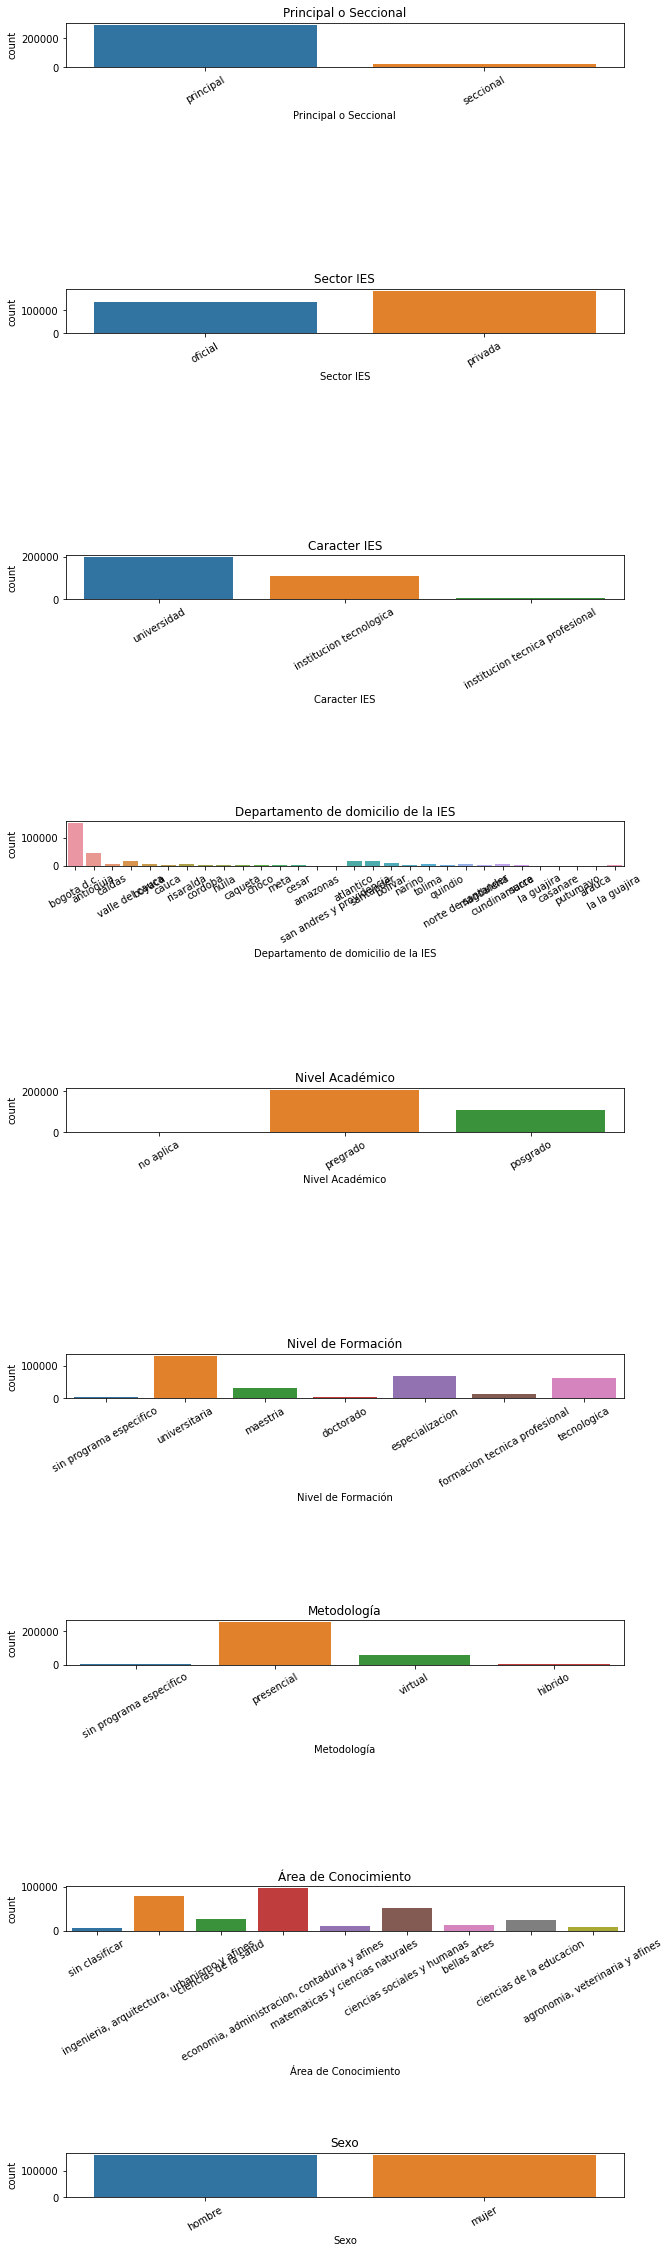

In [54]:
## Impresion de graficas

fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10,40))
fig.subplots_adjust(hspace=5)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col,data=df_concatenado,ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [44]:
print(df_concatenado['Caracter IES'].unique())
df_concatenado['Caracter IES'] = df_concatenado['Caracter IES'].str.replace('institucion universitaria/escuela tecnologica','institucion tecnologica',regex=False)
print(df_concatenado['Caracter IES'].unique())

['universidad' 'institucion universitaria/escuela tecnologica'
 'institucion tecnologica' 'institucion tecnica profesional']
['universidad' 'institucion tecnologica' 'institucion tecnica profesional']


In [45]:
print(df_concatenado['Departamento de domicilio de la IES'].unique())
df_concatenado['Departamento de domicilio de la IES'] = df_concatenado['Departamento de domicilio de la IES'].str.replace(r'bogota.*','bogota d.c.',regex=True)
df_concatenado['Departamento de domicilio de la IES'] = df_concatenado['Departamento de domicilio de la IES'].str.replace(r'cundinam.*','cundinamarca',regex=True)
df_concatenado['Departamento de domicilio de la IES'] = df_concatenado['Departamento de domicilio de la IES'].str.replace(r'guajira','la guajira',regex=False)
df_concatenado['Departamento de domicilio de la IES'] = df_concatenado['Departamento de domicilio de la IES'].str.replace(r'norte de sa.*','norte de santander',regex=True)
df_concatenado['Departamento de domicilio de la IES'] = df_concatenado['Departamento de domicilio de la IES'].str.replace(r'valle del c.*','valle del cauca',regex=True)
df_concatenado['Departamento de domicilio de la IES'] = df_concatenado['Departamento de domicilio de la IES'].str.replace(r'archipiela.*','san andres y providencia',regex=True)


print(df_concatenado['Departamento de domicilio de la IES'].unique())

['bogota d.c' 'antioquia' 'caldas' 'valle del cauca' 'boyaca' 'cauca'
 'risaralda' 'cordoba' 'huila' 'caqueta' 'choco' 'meta' 'cesar' 'amazonas'
 'san andres y providencia' 'atlantico' 'santander' 'bolivar' 'narino'
 'tolima' 'quindio' 'norte de santander' 'magdalena' 'cundinamarca'
 'sucre' 'guajira' 'casanare' 'putumayo' 'arauca' 'bogota d.c.'
 'la guajira' 'valle del c' 'archipielag' 'norte de sa' 'cundinamarc'
 'archipielago de san andres, providencia y santa catalina' 'bogota, d.c.']
['bogota d.c.' 'antioquia' 'caldas' 'valle del cauca' 'boyaca' 'cauca'
 'risaralda' 'cordoba' 'huila' 'caqueta' 'choco' 'meta' 'cesar' 'amazonas'
 'san andres y providencia' 'atlantico' 'santander' 'bolivar' 'narino'
 'tolima' 'quindio' 'norte de santander' 'magdalena' 'cundinamarca'
 'sucre' 'la guajira' 'casanare' 'putumayo' 'arauca' 'la la guajira']


In [46]:
print(df_concatenado['Nivel de Formación'].unique())
df_concatenado['Nivel de Formación'] = df_concatenado['Nivel de Formación'].str.replace('tecnologico','tecnologica',regex=False)
df_concatenado['Nivel de Formación'] = df_concatenado['Nivel de Formación'].str.replace('universitario','universitaria',regex=False)
df_concatenado['Nivel de Formación'] = df_concatenado['Nivel de Formación'].str.replace(r'especializacion medico quirur.*','especializacion medico quirurgica',regex=True)
df_concatenado['Nivel de Formación'] = df_concatenado['Nivel de Formación'].str.replace(r'especializacion tecnico profe.*','especializacion tecnico profesional',regex=True)
df_concatenado['Nivel de Formación'] = df_concatenado['Nivel de Formación'].str.replace('no aplica','sin programa especifico',regex=False)
df_concatenado['Nivel de Formación'] = df_concatenado['Nivel de Formación'].str.replace(r'especializacion.*','especializacion',regex=True)

print(df_concatenado['Nivel de Formación'].unique())

['no aplica' 'universitaria' 'maestria' 'doctorado'
 'especializacion universitaria' 'especializacion medico quirurgica'
 'formacion tecnica profesional' 'tecnologica'
 'especializacion tecnologica' 'especializacion tecnico profesional'
 'especializacion' 'especializacion medico quirur'
 'especializacion tecnico profe' 'sin programa especifico' 'universitario'
 'tecnologico']
['sin programa especifico' 'universitaria' 'maestria' 'doctorado'
 'especializacion' 'formacion tecnica profesional' 'tecnologica']


In [47]:
print(df_concatenado['Metodología'].unique())
df_concatenado['Metodología'] = df_concatenado['Metodología'].str.replace(r'a distancia.*','virtual',regex=True)
df_concatenado['Metodología'] = df_concatenado['Metodología'].str.replace(r'distancia.*','virtual',regex=True)
df_concatenado['Metodología'] = df_concatenado['Metodología'].str.replace('presencial-virtual','hibrido',regex=False)
df_concatenado['Metodología'] = df_concatenado['Metodología'].str.replace('virtual-dual','hibrido',regex=False)
df_concatenado['Metodología'] = df_concatenado['Metodología'].str.replace('dual','hibrido',regex=False)
df_concatenado['Metodología'] = df_concatenado['Metodología'].str.replace('presencial-hibrido','hibrido',regex=False)
df_concatenado['Metodología'] = df_concatenado['Metodología'].str.replace('no aplica','sin programa especifico',regex=False)

print(df_concatenado['Metodología'].unique())

['no aplica' 'presencial' 'distancia (tradicional)' 'distancia (virtual)'
 'a distancia (tradicional)' 'a distancia (virtual)'
 'distancia (tradicion' 'virtual' 'distancia (tradicio'
 'sin programa especifico' 'presencial-virtual' 'a distancia' 'dual'
 'virtual-dual' 'presencial-dual']
['sin programa especifico' 'presencial' 'virtual' 'hibrido']


In [48]:
print(df_concatenado['Área de Conocimiento'].unique())
df_concatenado['Área de Conocimiento'] = df_concatenado['Área de Conocimiento'].str.replace('ingenieria arquitectura urbanismo y afines','ingenieria, arquitectura, urbanismo y afines',regex=True)
df_concatenado['Área de Conocimiento'] = df_concatenado['Área de Conocimiento'].str.replace('economia administracion contaduria y afines','economia, administracion, contaduria y afines',regex=True)
df_concatenado['Área de Conocimiento'] = df_concatenado['Área de Conocimiento'].str.replace('agronomia veterinaria y afines','agronomia, veterinaria y afines',regex=True)
df_concatenado['Área de Conocimiento'] = df_concatenado['Área de Conocimiento'].str.replace('sin programa especifico','sin clasificar',regex=True)
df_concatenado['Área de Conocimiento'] = df_concatenado['Área de Conocimiento'].str.replace('no aplica','sin clasificar',regex=True)

print(df_concatenado['Área de Conocimiento'].unique())

['no aplica' 'ingenieria, arquitectura, urbanismo y afines'
 'ciencias de la salud' 'economia, administracion, contaduria y afines'
 'matematicas y ciencias naturales' 'ciencias sociales y humanas'
 'bellas artes' 'ciencias de la educacion'
 'agronomia, veterinaria y afines'
 'ingenieria arquitectura urbanismo y afines'
 'agronomia veterinaria y afines'
 'economia administracion contaduria y afines' 'sin programa especifico'
 'sin clasificar']
['sin clasificar' 'ingenieria, arquitectura, urbanismo y afines'
 'ciencias de la salud' 'economia, administracion, contaduria y afines'
 'matematicas y ciencias naturales' 'ciencias sociales y humanas'
 'bellas artes' 'ciencias de la educacion'
 'agronomia, veterinaria y afines']


In [49]:
print(df_concatenado['Sexo'].unique())
df_concatenado['Sexo'] = df_concatenado['Sexo'].str.replace('femenino','mujer',regex=True)
df_concatenado['Sexo'] = df_concatenado['Sexo'].str.replace('masculino','hombre',regex=True)

print(df_concatenado['Sexo'].unique())

['hombre' 'mujer' 'femenino' 'masculino']
['hombre' 'mujer']


In [50]:
df_concatenado = df_concatenado.drop(lista_columnas_a_eliminar, axis=1)
df_concatenado

,Institución de Educación Superior (IES),Principal o Seccional,Sector IES,Caracter IES,Departamento de domicilio de la IES,Programa Académico,Nivel Académico,Nivel de Formación,Metodología,Área de Conocimiento,Sexo,Año,Semestre,Inscripciones
0,universidad nacional de colombia,principal,oficial,universidad,bogota d.c.,sin programa especifico,no aplica,sin programa especifico,sin programa especifico,sin clasificar,hombre,2018,1,19770
1,universidad nacional de colombia,principal,oficial,universidad,bogota d.c.,sin programa especifico,no aplica,sin programa especifico,sin programa especifico,sin clasificar,hombre,2018,2,13085
2,universidad nacional de colombia,principal,oficial,universidad,bogota d.c.,sin programa especifico,no aplica,sin programa especifico,sin programa especifico,sin clasificar,mujer,2018,1,23959
3,universidad nacional de colombia,principal,oficial,universidad,bogota d.c.,sin programa especifico,no aplica,sin programa especifico,sin programa especifico,sin clasificar,mujer,2018,2,14837
4,universidad nacional de colombia,principal,oficial,universidad,bogota d.c.,ingenieria agronomica,pregrado,universitaria,presencial,"ingenieria, arquitectura, urbanismo y afines",hombre,2018,1,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53795,corporacion universitaria autonoma del norte,principal,privada,institucion tecnologica,norte de santander,especializacion en intervencion comunitaria,posgrado,especializacion,presencial,sin clasificar,mujer,2021,2,2
53796,corporacion universitaria autonoma del norte,principal,privada,institucion tecnologica,norte de santander,comunicacion social y medios,pregrado,universitaria,presencial,sin clasificar,hombre,2021,2,2
53797,corporacion universitaria autonoma del norte,principal,privada,institucion tecnologica,norte de santander,comunicacion social y medios,pregrado,universitaria,presencial,sin clasificar,mujer,2021,2,3
53798,corporacion universitaria autonoma del norte,principal,privada,institucion tecnologica,norte de santander,derecho,pregrado,universitaria,presencial,sin clasificar,hombre,2021,2,13


In [51]:
#eliminar datos faltantes
df_concatenado.dropna(inplace=True)
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368608 entries, 0 to 53799
Data columns (total 14 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Institución de Educación Superior (IES)  368608 non-null  object
 1   Principal o Seccional                    368608 non-null  object
 2   Sector IES                               368608 non-null  object
 3   Caracter IES                             368608 non-null  object
 4   Departamento de domicilio de la IES      368608 non-null  object
 5   Programa Académico                       368608 non-null  object
 6   Nivel Académico                          368608 non-null  object
 7   Nivel de Formación                       368608 non-null  object
 8   Metodología                              368608 non-null  object
 9   Área de Conocimiento                     368608 non-null  object
 10  Sexo                                     3686

In [52]:
#Eliminando registros repetidos
print(df_concatenado.shape)
df_concatenado.drop_duplicates(inplace=True)
print(df_concatenado.shape)

(368608, 14)
(317901, 14)


In [53]:
df_concatenado.to_excel('datos_limpios.xlsx',index=False)